In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset: https://ec.europa.eu/eurostat/databrowser/view/ds-045409__custom_16496269/default/table?lang=en

In [2]:
imports = pd.read_csv('data/estat_ds-045409_filtered_en .csv')

In [3]:
imports.index = imports.reporter
imports.drop(columns=['reporter', 'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Frequency',
       'flow', 'FLOW', 'indicators', 'INDICATORS', 'TIME_PERIOD', 'partner', 'PARTNER',
       'TIME_PERIOD.1', 'Observation Value'], inplace=True)

In [4]:
imports.columns = ['country', 'product_id','product_name', 'value']
imports

,country,product_id,product_name,value
reporter,,,,
AT,Austria,201,"Meat of bovine animals, fresh or chilled",166322603
AT,Austria,204,"Meat of sheep or goats, fresh, chilled or frozen",11339466
AT,Austria,207,Meat and edible offal of fowls of the species ...,267542908
AT,Austria,306,"Crustaceans, whether in shell or not, live, fr...",35962536
AT,Austria,803,"Bananas, incl. plantains, fresh or dried",110407182
...,...,...,...,...
SK,Slovakia,7502,Unwrought nickel,1544907
SK,Slovakia,7601,Unwrought aluminium,241672958
SK,Slovakia,7801,Unwrought lead :,2216998


In [5]:
# pivot table rows as countries and columns as products
imports_p = imports.pivot_table(index='country', columns='product_id', values='value', aggfunc=np.sum)
# fill NaN with 0
imports_p.fillna(0, inplace=True)

columns_to_drop = [2709, 27112100]

imports_p.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_53774/4134183718.py:2: FutureWarning: The provided callable <function sum at 0x7f800820db40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  imports_p = imports.pivot_table(index='country', columns='product_id', values='value', aggfunc=np.sum)


In [6]:
# import pandas as pd
# import numpy as np

# # ------------------------------------------------------------------
# # 0 · INPUTS
# # ------------------------------------------------------------------
# energy_ids = [27112100, 271111, 2701, 2709]
# food_ids   = [1001, 1005, 1006, 1007, 1511, 1514,
#               15121990, 15131999, 1201,
#               207, 201, 204, 803, 80510, 1701]
# fert_ids   = [310530, 310420, 310210, 2510]
# metals_ids = [7601, 7502, 7901, 7801, 8001, 7403,
#               2601, 7106, 7108, 7110]

# groups = {'energy': energy_ids,
#           'food'  : food_ids,
#           'fert'  : fert_ids,
#           'metals': metals_ids}

# # ------------------------------------------------------------------
# # 1 · BUILD GROUP‑NORMALISED SHARES   (rows = country, cols = HS6)
# # ------------------------------------------------------------------
# use_ids      = sum(groups.values(), [])        # flat list of HS6 codes
# imports_val  = imports_p[use_ids].copy()     # raw values (not yet shares)

# shares_inc = pd.DataFrame(index=imports_val.index,
#                           columns=imports_val.columns,
#                           dtype=float)

# for g, id_list in groups.items():
#     gsum = imports_val[id_list].sum(axis=1)             # Series (country totals)
#     shares_inc[id_list] = imports_val[id_list].div(
#                               gsum.replace(0, np.nan),   # avoid divide‑by‑zero
#                               axis=0)

# shares_inc = shares_inc.fillna(0.0)                      # countries w/ no group imports

# # ------------------------------------------------------------------
# # 2 · RESCALE SO EVERY ROW SUMS TO 4
# # ------------------------------------------------------------------
# row_sum = shares_inc.sum(axis=1)                         # Σ_k s_ik  (≤ 4)
# shares_scaled = shares_inc.mul(4 / row_sum, axis=0)

# # sanity check
# assert np.allclose(shares_scaled.sum(axis=1), 4, atol=1e-10)


In [7]:
# normalize the data so that each row sums to 1
imports_p = imports_p.div(imports_p.sum(axis=1), axis=0)
imports_p.head(3)

product_id,201,204,207,306,803,1001,1003,1005,1006,1007,...,310420,310530,9011100,9012100,9021000,9024000,12024200,15121990,15131999,23012000
country,,,,,,,,,,,,,,,,,,,,,
Austria,0.014260,0.000972,0.022939,0.003083,0.009466,0.022407,0.003336,0.022724,0.003986,0.000069,...,0.002785,0.001618,0.002744,0.029555,0.000452,0.000173,0.000492,0.008182,0.001363,0.000731
Belgium,0.014447,0.008231,0.028085,0.025944,0.044804,0.052199,0.021265,0.024108,0.018748,0.000560,...,0.019760,0.004859,0.043807,0.016785,0.001241,0.000418,0.001785,0.013779,0.002648,0.000430
Bulgaria,0.005890,0.002059,0.055007,0.010055,0.024564,0.008594,0.000464,0.034046,0.012217,0.000206,...,0.002436,0.018785,0.031668,0.030319,0.000395,0.000055,0.008035,0.011120,0.001050,0.000853


In [8]:

C = imports_p.sum(axis=1).iloc[0]        # should be 4 for every row
avg_shares = imports_p.mean(axis=0) / C
H = (avg_shares**2).sum()
N_eff = 1 / H


print(f"Herfindahl index : {H:0.4f}")
print(f"Effective shocks : {N_eff:0.1f}")


Herfindahl index : 0.0447
Effective shocks : 22.4


In [9]:
avg_shares.sort_values(ascending=False, inplace=True)
avg_shares

product_id
271111      0.094092
7601        0.092204
4407        0.082425
7108        0.054488
2601        0.048609
2701        0.043858
1005        0.039965
207         0.037953
9012100     0.034764
201         0.033852
7403        0.031546
4403        0.031135
1001        0.029407
803         0.022129
4412        0.020991
7110        0.019684
9011100     0.019216
1701        0.019139
4001        0.019035
306         0.018706
310210      0.018639
1511        0.017552
1514        0.015926
1201        0.014924
2401        0.013165
7901        0.012966
1003        0.010945
1006        0.009979
7502        0.009678
7801        0.008848
80510       0.008179
180100      0.007975
15121990    0.007719
1507        0.007219
7106        0.006549
310420      0.005935
204         0.005663
2510        0.005381
310530      0.004884
8001        0.004392
23012000    0.003022
12024200    0.002881
5201        0.001170
9024000     0.001112
15131999    0.001043
9021000     0.000896
1007        0.000161
dt

In [10]:
imports_p.to_csv('data/hs6_imports.csv')

# Bartik

In [11]:
shocks = {15121990: 67.25081991598961,
 2701: 59.45163747143947,
 7502: 51.74937598969376,
 27112100: 50.00693833891724,
 1001: 37.365245101362795,
 310530: 34.13737882124167,
 2709: 33.93311089927312,
 1507: 33.16094613353658,
 1511: 32.136616125937884,
 207: 29.414880294659305,
 310420: 24.422438043353743,
 1005: 21.294794068254934,
 1201: 18.867737784962554,
 7601: 16.38034850531274,
 1514: 15.918643050135111,
 2601: 14.743831585301434,
 230400: 14.233888582879056,
 151329: 11.189139216409586,
 15131999: 10.618310236392299,
 7901: 10.087687614263412,
 7106: 9.30995768201053,
 7108: 7.2581799759914505,
 5201: 6.876183263915185,
 803: 6.4336885630862595,
 8001: 5.163632970183078,
 7110: 4.93989840567319,
 7403: 4.5853037207866345,
 1701: 4.555433589462135,
 201: 4.508780256288561,
 2510: 3.2461156356495144,
 310210: 3.086084264751058,
 271111: 2.898216726155981,
 2401: 1.7540505663623676,
 306: 1.1780495079033733,
 12024200: 0.7941603866040351,
 7801: 0.5570684220683251,
 204: 0.23244156549283415,
 180100: -0.33841839050645545,
 1006: -1.1709601873536302,
 4001: -1.8942161767185568,
 4407: -2.8394424367578828,
 4403: -3.127370816824157,
 4412: -3.1273708168258203,
 80510: -3.3411137041536927,
 9011100: -4.648074369189914,
 9012100: -8.674423257147277,
 9024000: -13.523944929072886}

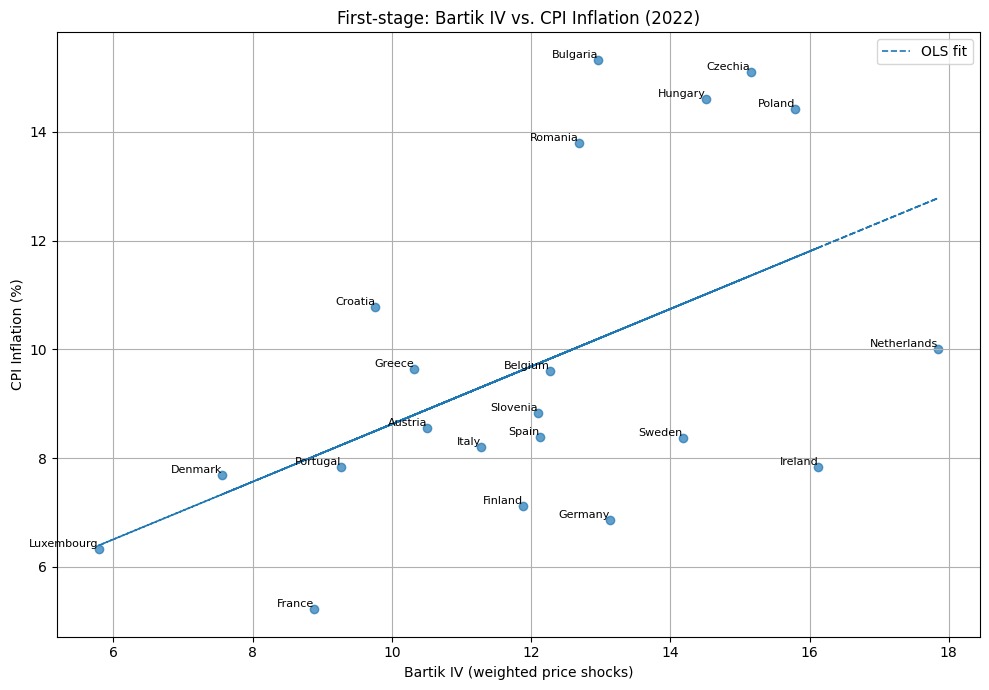

In [12]:
# ---------- 3. Compute Bartik IV ----------
common_cols = [col for col in shocks if col in imports_p.columns]
shocks_vector = pd.Series(shocks).reindex(common_cols)

# Compute Bartik IV: weighted sum of shares × global price shocks
imports_p['bartik_iv'] = imports_p[common_cols].dot(shocks_vector)

# ---------- 4. Prepare for merging with inflation data ----------
bartik = imports_p.reset_index()  # 'country' becomes a column again

# ---------- 5. Load World Bank inflation data ----------
wb = pd.read_csv('../Design/data/world_inflation.csv', skiprows=4)
wb_2022 = wb[['Country Name', 'Country Code', '2022']].rename(columns={'2022': 'inflation_2022'})

# ---------- 6. Merge and filter ----------
merged = bartik.merge(wb_2022, left_on='country', right_on='Country Name', how='left')
merged = merged.dropna(subset=['inflation_2022'])
merged['inflation_2022'] = pd.to_numeric(merged['inflation_2022'], errors='coerce')
merged = merged[merged['inflation_2022'] <= 30]

europe_or_nearby = [
    "Austria", "Belarus", "Belgium", "Bulgaria", "Croatia", "Czechia",
    "Denmark", "Finland", "France", "Germany", "Greece",
    "Hungary", "Ireland", "Italy", "Kazakhstan",
    "Luxembourg", "Netherlands", "North Macedonia", "Norway", "Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom"
]

# outtliers: "Latvia", "Lithuania", "Estonia"

merged = merged[merged['country'].isin(europe_or_nearby)]

# ---------- 7. Plot: Bartik IV vs. CPI Inflation ----------
x = merged['bartik_iv'].values
y = merged['inflation_2022'].values
names = merged['country'].values

# Fit OLS regression
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.7)

# Annotate each point with country name
for i, name in enumerate(names):
    plt.text(x[i], y[i], name, fontsize=8, ha='right', va='bottom')

# Plot regression line
plt.plot(x, m * x + b, linestyle='--', linewidth=1.2, label='OLS fit')

plt.title("First-stage: Bartik IV vs. CPI Inflation (2022)")
plt.xlabel("Bartik IV (weighted price shocks)")
plt.ylabel("CPI Inflation (%)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare data for regression
reg_df = merged[['inflation_2022', 'bartik_iv']].dropna()
X = sm.add_constant(reg_df['bartik_iv'])  # adds intercept term
y = reg_df['inflation_2022']

# Fit OLS model (first-stage)
model = sm.OLS(y, X).fit()

# Print regression summary and F-statistic
print(model.summary())
print(f"\nFirst-stage F-statistic: {model.fvalue:.2f}, p-value: {model.f_pvalue:.4f}")


                            OLS Regression Results                            
Dep. Variable:         inflation_2022   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     6.620
Date:                Sun, 04 May 2025   Prob (F-statistic):             0.0186
Time:                        15:20:10   Log-Likelihood:                -49.790
No. Observations:                  21   AIC:                             103.6
Df Residuals:                      19   BIC:                             105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3287      2.562      1.299      0.2

In [14]:
final_bartik = imports_p['bartik_iv'].copy()
final_bartik.to_csv('data/bartik_iv.csv', index=True)